<img src="Scoreboard.jpg" width=800 height=1900>

<h1><center> Predicting The Colle Experience Using College Scorecard <center></h1>

<center><b>Zion Joseph, Kelli Webber</b></center>

<h1><center>Introduction</center></h1>
<h3>Right after highschool, students are often faced with the decision of going to college. Most students want to go to school where they feel would be best for them. College is an expensive commitment, and so students may look into a variety of factors. Often this comes down to wether the or not the college feels the most comfortable for students, but it might also be some of the demographics. When applying for schools, students coul look at the schools location, number of undergrads, base truition and demographics of people who already go to the college in order to predict if the school is the right fit.</h3>

<h3>While using data from a college scorecord my group wanted to know if it would be possible to predict what type of school would best fit a certain demographic.</h3>
<h1><center>Pulling The Data</center></h1>
<h2>Importing libaries</h2>

These are the necessary libaries:
> folium: Visualize location data on a map<br />
pandas: Data management and control<br />
numpy: Support functions for data <br />
matplotlib: To plot data points<br />
sklearn: Visualize linear regression models<br />
warining: Control over output warnings

In [25]:
%%capture
!pip install folium
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

<h2>Pulling The Data from CSV</h2>
<h3>The first step after importing all of the libaries is to go ahead and get the data. This data has been provided by <a href ='https://collegescorecard.ed.gov/data/'>collegescorecard.ed.gov</a>, and is also avaliable on ZionJoseph.github.io. This data has been collected by the government</h3>

In [26]:
#use pandas read_csv to pull the data from the csv file into a variable named odata(original data)
odata = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv")
#display the first coulple of rows inside of the new dataframe
odata.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,0.4694,0.5136,0.0034,0.1429,0.3401,0.3333,0.3333,0,0,0.6667
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.6117,0.624,0.0075,0.2166,0.1519,0.3642,0.4,0.0434,0.2755,0.2811
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.5503,0.5562,0.0059,0.4379,0,0.4429,0.4714,0.0429,0.4857,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5456,0.5651,0.0123,0.2841,0.1385,0.3378,0.3547,0.0236,0.4257,0.1959
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4105,0.429,0.0062,0.216,0.3488,0.2931,0.3103,0.0345,0.3966,0.2586


<h3>Now there is a slight problem with our current dataset; it has too much columns!. Many of these colums are for data that won't be necessary. so we will get rid of the columns for these ones. </h3>

<h2>Tidying of Columns</h2>
<h3>To make our dataframe more easier to use,  make a new variable named data to hold the dataframe with our specified columns</h3>


The column names are as follows:
> INSTNM: For the name of the institution<br />
CITY: Name of th city the college is in<br />
STABBR: State abbreviation<br />
LONGITUDE: Longitude for school location<br />
LATITUDE: Latitude for school location <br />
MENONLY: Wether school is only for men<br />
WOMENONLY: Wether school is only for women<br />
ADM_RATE: The decimal rate of acceptance <br />
TUITIONFEE_IN: The in state tuition for the college<br />
TUITIONFEE_OUT: The out of state tution for the college<br />
UGDS: Number of undergraduates<br />
AGE_ENTRY: Average age of students entering that university<br />

In [27]:
# Choose specific columns to have in new dataframe
data = odata[['INSTNM', 'CITY', 'STABBR', 'LONGITUDE', 'LATITUDE', 'MENONLY', 'WOMENONLY','ADM_RATE', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'UGDS', 'AGE_ENTRY']]
# display the first couple of values of the new dataframe
data.head()

,INSTNM,CITY,STABBR,LONGITUDE,LATITUDE,MENONLY,WOMENONLY,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,AGE_ENTRY
0,Alabama A & M University,Normal,AL,-86.568502,34.783368,0.0,0.0,0.8738,9366.0,17496.0,4616.0,20.283741368
1,University of Alabama at Birmingham,Birmingham,AL,-86.799345,33.505697,0.0,0.0,0.5814,8040.0,18368.0,12047.0,23.60797466
2,Amridge University,Montgomery,AL,-86.174010,32.362609,0.0,0.0,NaN,7180.0,7180.0,293.0,33.672297297
3,University of Alabama in Huntsville,Huntsville,AL,-86.640449,34.724557,0.0,0.0,0.7628,9842.0,20612.0,6346.0,22.727919632
4,Alabama State University,Montgomery,AL,-86.295677,32.364317,0.0,0.0,0.4590,9220.0,16156.0,4704.0,20.130990415


In order to make the data more readable, some data that can be represented in one column should be put together. Looking at our data, the columns MENONLY and WOMENONLY are both essentially the same, and so we can reduce these columns into one. 

In [28]:
#Tidying the MENONLY and WOMENONLY column
#New variable to hold combined series
gender = []
#Iterate through each row of the dataset
for index, row in data.iterrows():
    # checks to see if menonly, womenonly, nan, or CO-ED
    if np.isnan(row ['WOMENONLY']) | np.isnan(row ['MENONLY']):
        gender.append(float('nan'))
    elif (row ['WOMENONLY'] == 1.) & (row ['MENONLY'] == 0.):
        gender.append('WOMENONLY')
    elif (row ['MENONLY'] == 1.) & (row ['WOMENONLY'] == 0.):
        gender.append('MENONLY')
    else:# (row ['WOMENONLY']) == 0. & (row ['MENONLY']) == 0.:
        gender.append('CO-ED')
# drop redundant columns       
data = data.drop(columns=['WOMENONLY', 'MENONLY'])
# add new column gender
data['GENDER']= gender

# Reorganize the columns to reflect gender to where menonly and womenonly used to be
data = data[['INSTNM', 'CITY', 'STABBR', 'LONGITUDE', 'LATITUDE', 'GENDER', 'ADM_RATE', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'UGDS', 'AGE_ENTRY']]
# display the first couple of values of the new dataframe
data.head()

,INSTNM,CITY,STABBR,LONGITUDE,LATITUDE,GENDER,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,AGE_ENTRY
0,Alabama A & M University,Normal,AL,-86.568502,34.783368,CO-ED,0.8738,9366.0,17496.0,4616.0,20.283741368
1,University of Alabama at Birmingham,Birmingham,AL,-86.799345,33.505697,CO-ED,0.5814,8040.0,18368.0,12047.0,23.60797466
2,Amridge University,Montgomery,AL,-86.174010,32.362609,CO-ED,NaN,7180.0,7180.0,293.0,33.672297297
3,University of Alabama in Huntsville,Huntsville,AL,-86.640449,34.724557,CO-ED,0.7628,9842.0,20612.0,6346.0,22.727919632
4,Alabama State University,Montgomery,AL,-86.295677,32.364317,CO-ED,0.4590,9220.0,16156.0,4704.0,20.130990415


<h1><center>Visualization and Anaylsis</center><h1>
<h2>Visualization of college locations</h2>

In [29]:
map_osm = folium.Map(location=[39.29, -100.61], zoom_start=4)
sampdata = data.sample(n = 1000)
noNaN = sampdata.dropna(subset = ['LATITUDE', 'LONGITUDE'])

for index, row in noNaN.iterrows():   
    color= 'black'
    folium.Circle(
    tooltip=row['INSTNM'],
    radius=40000,
    location=[row['LATITUDE'], row['LONGITUDE']],
    color=color,
    fill=True,
).add_to(map_osm)
    
map_osm

<h2><center>Exploratory Data analysis</center></h2>

In [30]:
admissions = data.dropna(subset = ['INSTNM', 'ADM_RATE'])
admissions= admissions.groupby(['STABBR'], as_index=False)['ADM_RATE', 'UGDS'].mean()
admissions.head()

,STABBR,ADM_RATE,UGDS
0,AK,0.650850,4641.000000
1,AL,0.638853,4839.566667
2,AR,0.697232,4154.105263
3,AZ,0.676111,10085.736842
4,CA,0.612773,5656.950704


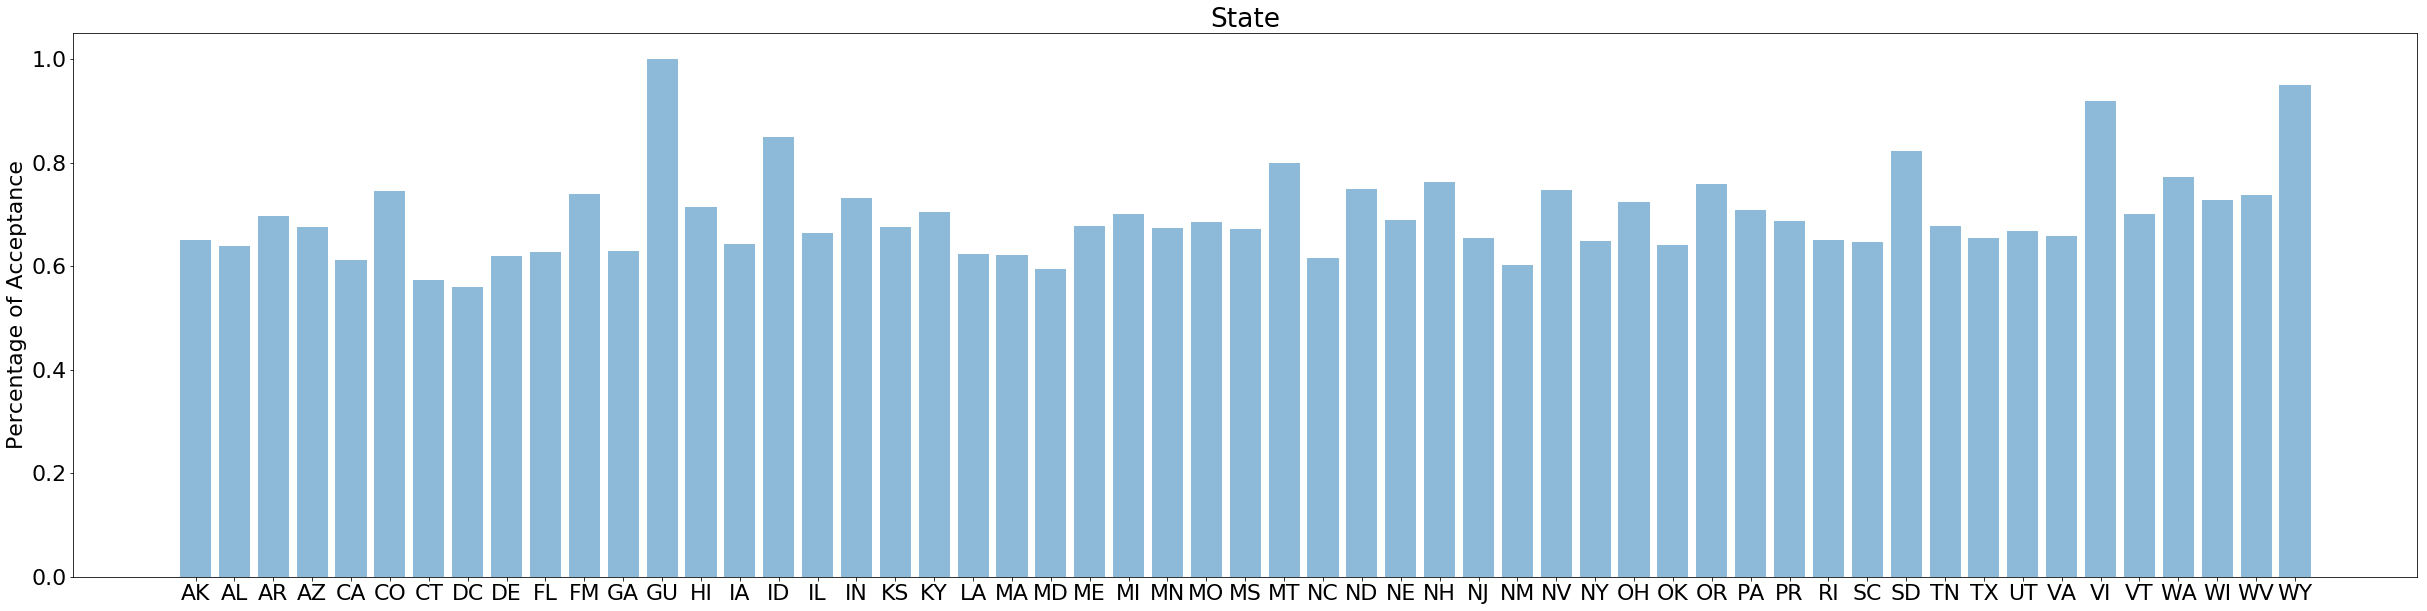

In [31]:
plt.figure(num=None, figsize=(42, 10))
x = admissions['STABBR']
y = admissions['ADM_RATE']
plt.rcParams.update({'font.size': 22})
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Percentage of Acceptance')
plt.title('State')
 
plt.show()

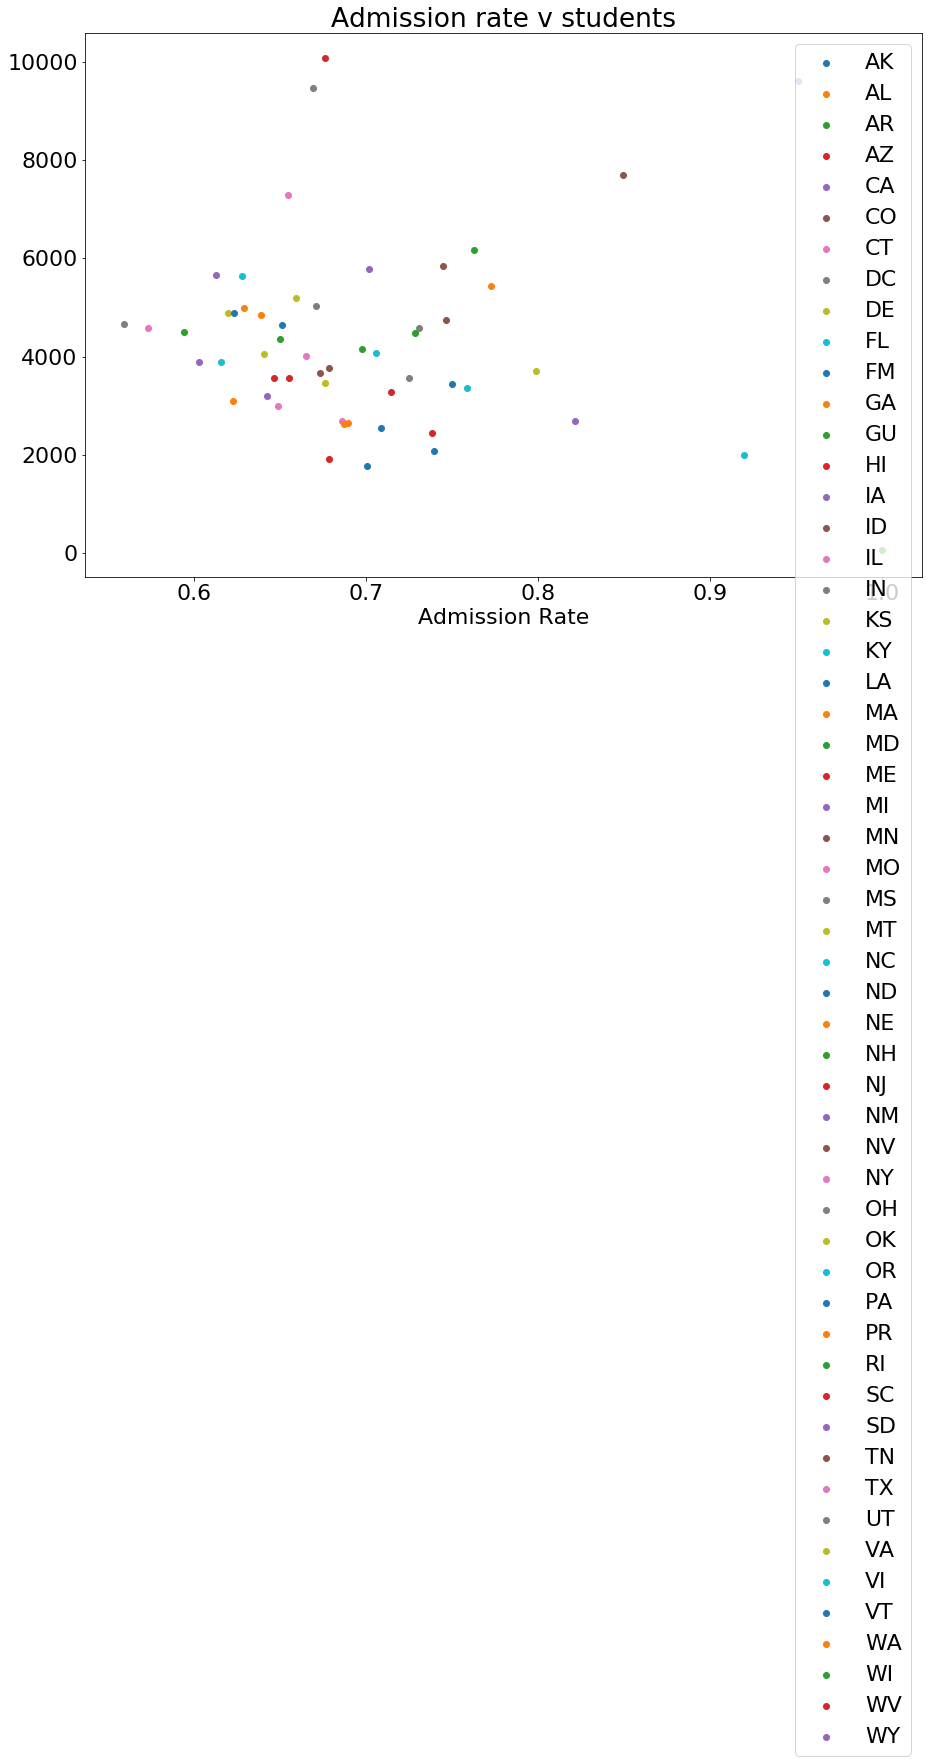

In [32]:
z = admissions['UGDS']
fig = plt.figure(figsize=(15,10))  
ax = fig.add_subplot(1,1,1)

States = []
for ele, d in admissions.groupby('STABBR'):
    States.append(str(ele)) 

for b, d in admissions.groupby('STABBR'):
    plt.scatter(d['ADM_RATE'], d['UGDS'], label= str(admissions['STABBR']))
ax.legend(States)
# plot.set_yticks(numpy.arange(0,  238070000, 5000000))
ax.set_title("Admission rate v students")
ax.set_xlabel("Admission Rate")

plt.show()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

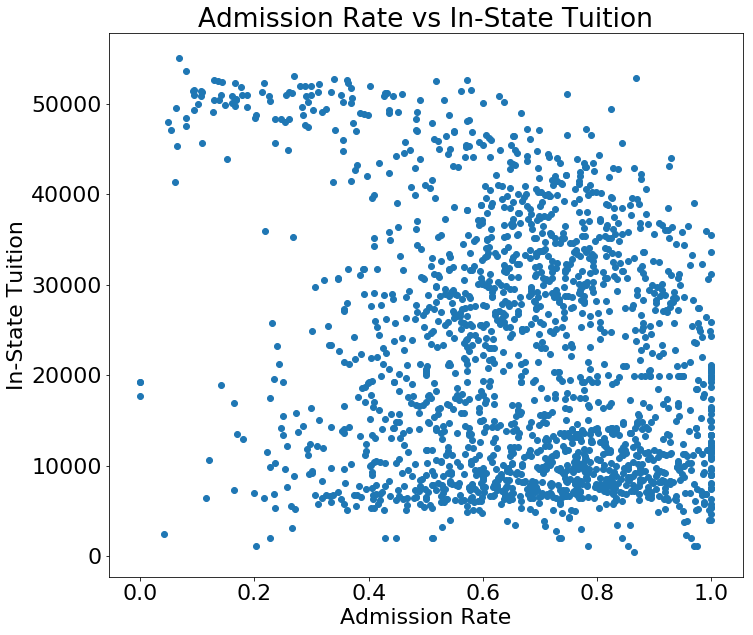

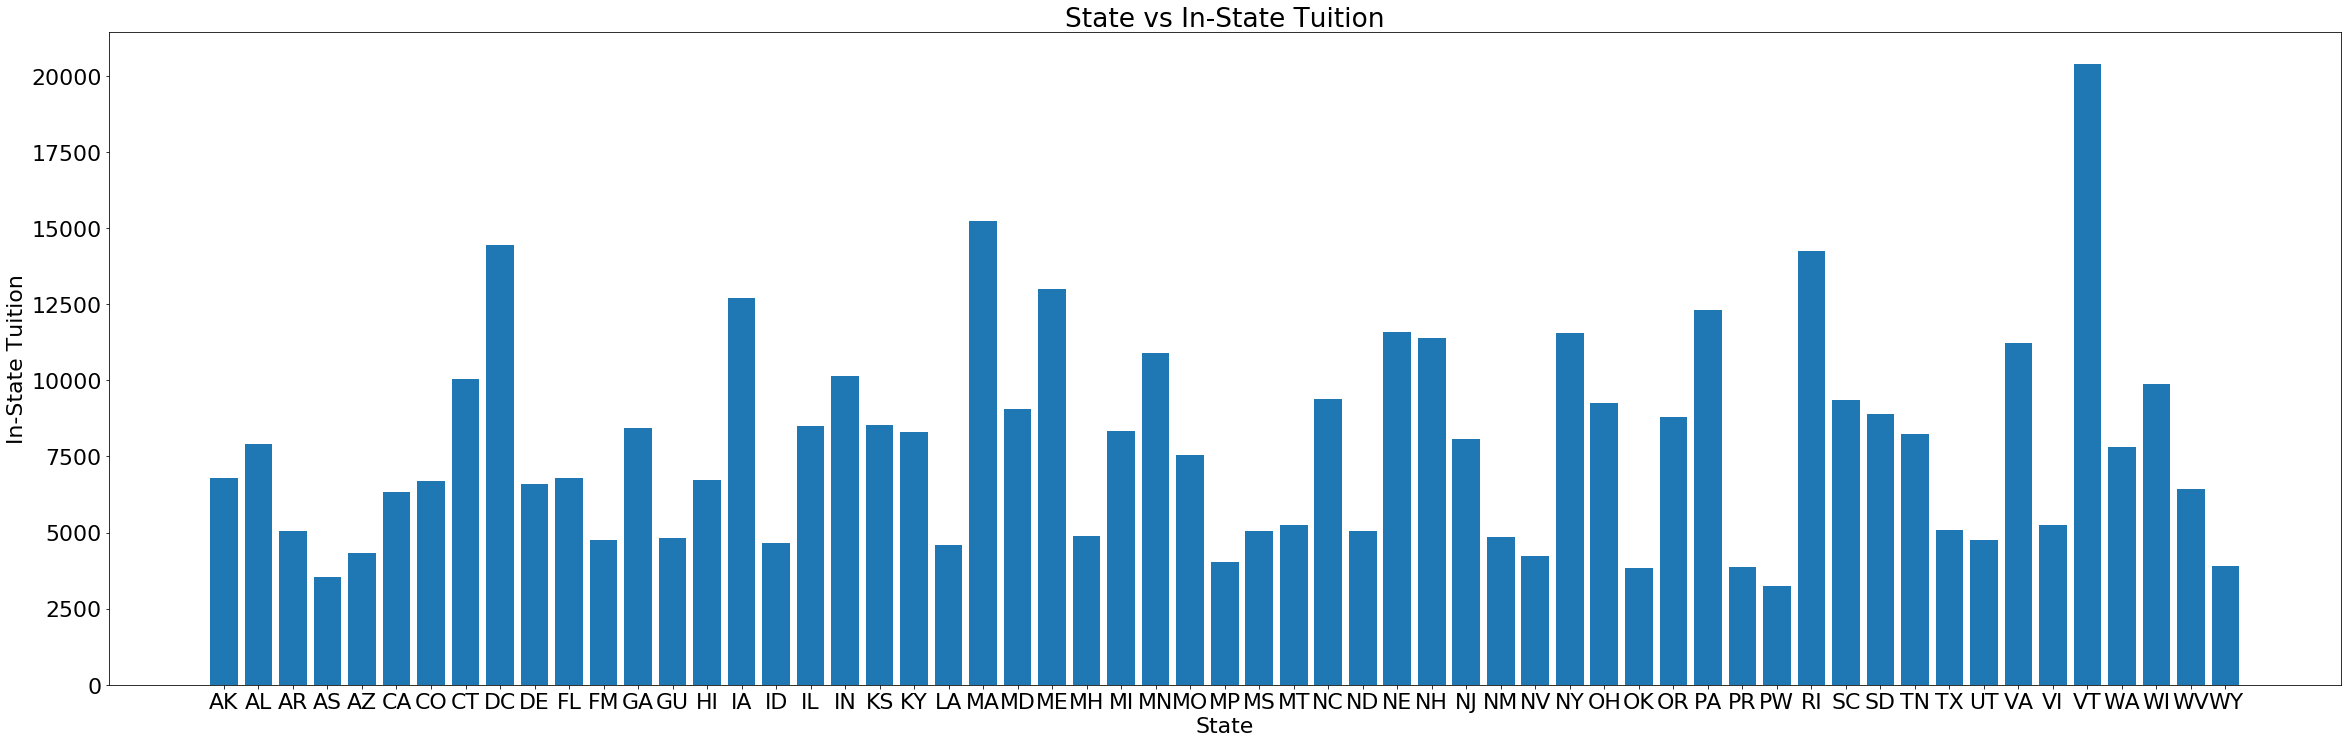

In [33]:
fig = plt.figure(figsize=(25,10))
plot = fig.add_subplot(121)
plot.scatter(data['ADM_RATE'],data['TUITIONFEE_IN'])
plot.set_title('Admission Rate vs In-State Tuition')
plot.set_xlabel('Admission Rate')
plot.set_ylabel('In-State Tuition')
plt


fig = plt.figure(figsize=(40,12))
plot = fig.add_subplot(1,1,1)

State_Abbr = []
for ele, df in data.groupby('STABBR'):   
    State_Abbr.append(str(ele))

tuition_averages = []
for b, df in data.groupby('STABBR'):   
    t = df['TUITIONFEE_IN'].sum()
    c = len(df['TUITIONFEE_IN'])
    tuition_averages.append(t/c)

x_pos = [i for i, _ in enumerate(State_Abbr)]
plt.bar(State_Abbr, tuition_averages)
plot.set_title('State vs In-State Tuition')
plot.set_xlabel('State')
plot.set_ylabel('In-State Tuition')
plt